In [ ]:
## referene: https://towardsdatascience.com/learn-word2vec-by-implementing-it-in-tensorflow-45641adaf2ac

In [231]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline



corpus_raw = "He is king. The king is loyal. She is the royal queen."

#cover to lower case
corpus_raw = corpus_raw.lower()

In [125]:
def Remove_Punctuations(string):
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    no_pun = ""
    for char in string:
        if char not in punctuations:
            no_pun += char
    return(no_pun)

In [126]:
Remove_Punctuations = Remove_Punctuations(corpus_raw)

In [127]:
words = []
[words.append(word) for word in Remove_Punctuations.split() if word != '.']


[None, None, None, None, None, None, None, None, None, None, None, None]

In [128]:
words

['he',
 'is',
 'king',
 'the',
 'king',
 'is',
 'loyal',
 'she',
 'is',
 'the',
 'royal',
 'queen']

In [129]:
words = set(words) ## remove duplicates   
'''datatype == set'''
#{'he', 'is', 'king', 'loyal', 'queen', 'royal', 'she', 'the'}

'datatype == set'

In [130]:
word2int = {}
int2word = {}

vocab_size = len(words)
vocab_size

8

In [131]:

for i, word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

int2word

{0: 'the',
 1: 'loyal',
 2: 'royal',
 3: 'she',
 4: 'is',
 5: 'he',
 6: 'queen',
 7: 'king'}

In [150]:
corpus_raw

'he is king. the king is loyal. she is the royal queen.'

In [172]:
raw_sentence = corpus_raw.split(".")
sentences = []
[sentences.append(sentence.split()) for sentence in raw_sentense] #spilt(',') & split() different
# for sentence in raw_sentence:
#     sentences.append(sentence.split())

[None, None, None, None]

In [173]:
sentences.remove(sentences[-1]) #remove last one

In [175]:
sentences

[['he', 'is', 'king'],
 ['the', 'king', 'is', 'loyal'],
 ['she', 'is', 'the', 'royal', 'queen']]

In [196]:
data = []
window_size = 2
for sentence in sentences:
    for index, word in enumerate(sentence):
        for nb_word in sentence[max(index - window_size, 0): min(index + window_size, len(sentence)) + 1] :
            if nb_word != word:
                data.append([word, nb_word])
            

In [197]:
data

[['he', 'is'],
 ['he', 'king'],
 ['is', 'he'],
 ['is', 'king'],
 ['king', 'he'],
 ['king', 'is'],
 ['the', 'king'],
 ['the', 'is'],
 ['king', 'the'],
 ['king', 'is'],
 ['king', 'loyal'],
 ['is', 'the'],
 ['is', 'king'],
 ['is', 'loyal'],
 ['loyal', 'king'],
 ['loyal', 'is'],
 ['she', 'is'],
 ['she', 'the'],
 ['is', 'she'],
 ['is', 'the'],
 ['is', 'royal'],
 ['the', 'she'],
 ['the', 'is'],
 ['the', 'royal'],
 ['the', 'queen'],
 ['royal', 'is'],
 ['royal', 'the'],
 ['royal', 'queen'],
 ['queen', 'the'],
 ['queen', 'royal']]

In [200]:
#convert to one-hot 

def to_one_hot(data_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_index] = 1
    return temp

X_train = []
y_train = []

for data_word in data:
    X_train.append(to_one_hot(word2int[data_word[0]],vocab_size))
    y_train.append(to_one_hot(word2int[data_word[1]],vocab_size))
    
#to np.array

X_train = np.array(X_train)
y_train = np.array(y_train)


In [203]:
print(X_train.shape, y_train.shape)

(30, 8) (30, 8)


In [204]:
#Make TF model
x = tf.placeholder(tf.float32, shape = (None, vocab_size))
y_label = tf.placeholder(tf.float32, shape = (None, vocab_size))

In [209]:
embedding_dim = 5
w1 = tf.Variable(tf.random_normal(shape = [vocab_size, embedding_dim]))
b1 = tf.Variable(tf.random_normal([embedding_dim])) #if no [], it would erroe

h1 = tf.add(tf.matmul(x,w1), b1)

In [210]:
#deconvolution

w2 = tf.Variable(tf.random_normal([embedding_dim, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))

prediction = tf.nn.softmax(tf.add(tf.matmul(h1, w2), b2))

In [215]:
501 % 500

1

In [220]:
## training

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

#define loss function
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis = 1))

#define training steps

train_step = tf.train.GradientDescentOptimizer(0.001).minimize(cross_entropy_loss)

n_iter = 10001
for i in range(n_iter):
    sess.run(train_step, feed_dict = {x:X_train, y_label: y_train})

    if i % 500 == 0:
        print("iter : {} ,loss is :{}".format( i ,sess.run(cross_entropy_loss, feed_dict = {x:X_train, y_label : y_train})))

iter : 0 ,loss is :5.454780101776123
iter : 500 ,loss is :3.1797587871551514
iter : 1000 ,loss is :2.727567434310913
iter : 1500 ,loss is :2.5255672931671143
iter : 2000 ,loss is :2.3933401107788086
iter : 2500 ,loss is :2.294651746749878
iter : 3000 ,loss is :2.215737819671631
iter : 3500 ,loss is :2.1498067378997803
iter : 4000 ,loss is :2.0931475162506104
iter : 4500 ,loss is :2.043578624725342
iter : 5000 ,loss is :1.9997187852859497
iter : 5500 ,loss is :1.9606295824050903
iter : 6000 ,loss is :1.925628423690796
iter : 6500 ,loss is :1.8941948413848877
iter : 7000 ,loss is :1.8659082651138306
iter : 7500 ,loss is :1.8404203653335571
iter : 8000 ,loss is :1.8174313306808472
iter : 8500 ,loss is :1.7966763973236084
iter : 9000 ,loss is :1.777917504310608
iter : 9500 ,loss is :1.760936975479126
iter : 10000 ,loss is :1.7455357313156128


In [221]:
print(sess.run(w1))
print('----------')
print(sess.run(b1))
print('----------')

[[ 0.71522689  0.82355374  0.50510323  0.23424508  0.15557805]
 [-0.90964729 -0.4313322   0.14567941 -0.17226715 -0.31882137]
 [-0.79230016  0.48592439 -0.62649763 -0.01178129 -1.71997523]
 [ 1.57645917  0.60581106 -2.48719311 -1.01684153 -0.66595626]
 [-0.34832969 -0.22489746  0.10805894  0.26057795 -0.1220635 ]
 [-1.60010123 -0.2585701  -0.45608088 -0.24865095 -0.29532483]
 [-0.34532425  0.6934796  -0.6759395  -0.27927086 -0.69181055]
 [-0.09686808  0.22571857 -0.5894956  -0.59333175 -0.95991462]]
----------
[-0.41202977  0.90769064 -0.27769288 -1.18541813  0.02963074]
----------


In [223]:
#transform vector
vectors = sess.run(w1 + b1)

In [224]:
print(vectors[ word2int['queen'] ])

[-0.75735402  1.6011703  -0.95363235 -1.46468902 -0.66217983]


In [225]:
#Here’s a quick function to find the closest vector to a given vector. 

In [226]:
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

In [227]:
print(int2word[find_closest(word2int['king'], vectors)])
print(int2word[find_closest(word2int['queen'], vectors)])
print(int2word[find_closest(word2int['royal'], vectors)])

queen
king
queen


In [228]:
# USE tSNE

from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)


In [229]:
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')


the -0.994939
loyal 0.916676
royal 0.375739
she 0.373768
is 0.944338
he -0.55404
queen 0.937099
king -0.451298


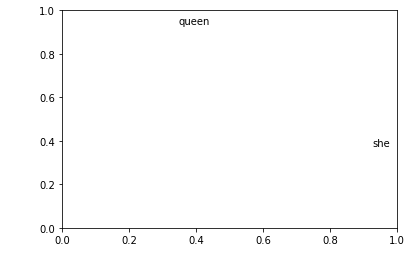

In [234]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
plt.show()
